# date statistics
I wasn't sure how often horses are actually racing year round, so I wanted to visualize how many races there were per day througout the year. Seems like there's a race pretty much every day in this dataset. Note that some days have no races because that day doesn't exist (ex. feburary 30th)

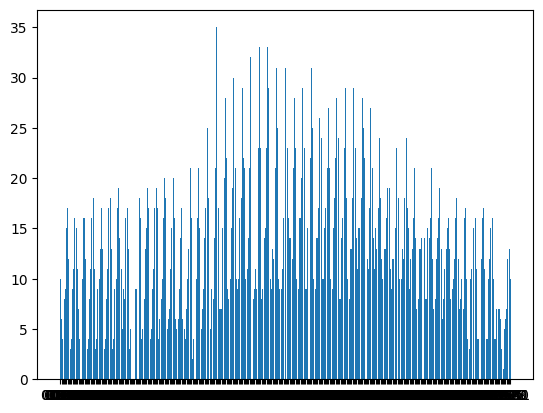

In [1]:
import os
import re
import matplotlib.pyplot as plt

files = os.listdir("./equibase/2023 Result Charts")
freq = {}
for m in range(1,13):
    for d in range (1,32):
        dstring = str(m).zfill(2)+"-"+str(d).zfill(2)
        freq[dstring] = 0

for f in files:
    date = re.match("[a-z]{2,3}(\\d{4})(\\d{2})(\\d{2})tch\\.xml",f).groups()
    date = str(date[1])+"-"+str(date[2])
    freq[date]+=1

date, frequency = zip(*freq.items())

plt.bar(date,frequency)
plt.show()

# names
I wanted to find out how many horses there are and test if their names are a reliable identifier. After testing there was the same ammount with both the raw name and `.upper()` so good enough for me

In [3]:
import xmlschema
import os

xs = xmlschema.XMLSchema("./equibase/tchSchema.xsd")

result_dir = "./equibase/2023 Result Charts" 
files = os.listdir(result_dir)

names = []
for f in files:
    try:
        d = xs.to_dict(result_dir+"/"+f)
    except xmlschema.validators.exceptions.XMLSchemaDecodeError:
        continue
    for r in d['RACE']:
        for e in r['ENTRY']:
            n = e['NAME'].upper()
            if n not in names:
                names.append(n)

print(len(names))

58827


# num races per horse
how many races does each horse run in the year? for trueskill to work well we need to have about 3-5 ish minimum before we start seeing actionable results. this used to use NAME but now it uses AXCISKEY because I found it to be a better primary key

e:2
l:56186


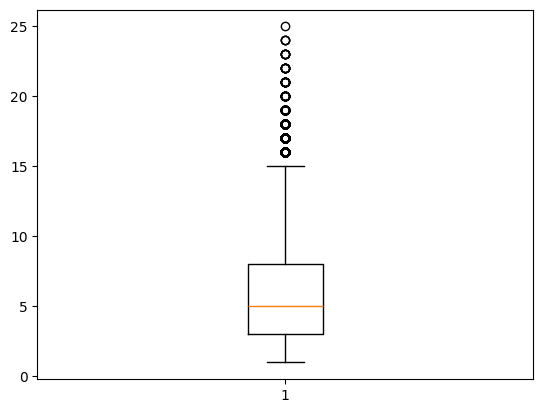

In [24]:
import matplotlib.pyplot as plt
import xmlschema
import os
from collections import Counter

xs = xmlschema.XMLSchema("./equibase/tchSchema.xsd")

result_dir = "./equibase/2023 Result Charts" 
files = os.listdir(result_dir)

names = []
errors = 0
for f in files:
    try:
        d = xs.to_dict(result_dir+"/"+f)
    except xmlschema.validators.exceptions.XMLSchemaDecodeError:
        errors +=1
        continue
    for r in d['RACE']:
        for e in r['ENTRY']:
            n = e['AXCISKEY']
            names.append(n)

rc = Counter(names)

print(f"e:{errors}")
print(f"l:{len(rc.values())}")

plt.boxplot(rc.values())
plt.show()

# race results extraction
testing extracting a race ordering from the dataset.

some races don't include dollar odds?!?!?!?!?



In [20]:
import xmlschema

xs = xmlschema.XMLSchema("./equibase/tchSchema.xsd")
d = xs.to_dict("./equibase/2023 Result Charts/wo20231202tch.xml")

r = d['RACE'][0]

for e in r['ENTRY']:
    print(f"{e['NAME']} {e['DOLLAR_ODDS']} {e['OFFICIAL_FIN']} {e['AXCISKEY']}")

Manetka 11.55 2 050049050052057053057064
Street Serenade 17.05 4 050049050052055053060057
Jack 2.65 7 049057050051056062061060
Dixie's Flatter 18.70 8 049058050052061055056062
Amazon Forester 2.50 5 050049050051058057058062
Discovery Chart 7.90 6 050049050052056062062057
Sunyani 4.30 1 050049050052061059061061
Brother Belen 6.35 3 050049050052055055059060


# is `AXCISKEY` unique?
every entry seems to have this but idk what it actually means. would be nice to have a pk that isn't the horse's name

In [21]:
import xmlschema
import os

xs = xmlschema.XMLSchema("./equibase/tchSchema.xsd")

result_dir = "./equibase/2023 Result Charts" 
files = os.listdir(result_dir)

key_to_name = {}
for f in files:
    try:
        d = xs.to_dict(result_dir+"/"+f)
    except xmlschema.validators.exceptions.XMLSchemaDecodeError:
        continue
    for r in d['RACE']:
        for e in r['ENTRY']:
            n = e['NAME']
            k = e['AXCISKEY']

            if k in key_to_name.keys():
                if n in key_to_name[k]:
                    # key exists and name already mapped to key
                    pass
                else:
                    key_to_name[k].append(n)
                    print(f"new name for key:{k}\n{key_to_name[k]}")
            else:
                key_to_name[k]=[n]

new name for key:050049050052056053061058
['Character Counts', 'dh-Character Counts']
new name for key:049058050052060053062061
['dq-Cajun Mandate', 'Cajun Mandate']
new name for key:081052051059056058059064
['dh-One Fast B', 'One Fast B']
new name for key:081051059058053057059055
['dhdq-Cartel Fire Two', 'Cartel Fire Two']
new name for key:049058050052060060057058
['Spend Again', 'dq-Spend Again']
new name for key:081052051054057056061056
['Jess Southard', 'dq-Jess Southard']
new name for key:049057050052061060061060
['dh-Hulen', 'Hulen']
new name for key:049054050051059061061060
['dh-Lovethatcause', 'Lovethatcause']
new name for key:049056050051061060058064
['dq-Montauk Daddy', 'Montauk Daddy']
new name for key:049058050052059054057062
["Jack's Lilly", "dh-Jack's Lilly"]
new name for key:049058050052053058062058
['Artificial Intell', 'dq-Artificial Intell']
new name for key:081052052059061053062064
['Pandemiccowboy', 'dh-Pandemiccowboy']
new name for key:050049050051060057054055
['Le

KeyboardInterrupt: 

seems like they're adding extra info to the names of horses. I sure do love when non-computer people do stupid shit